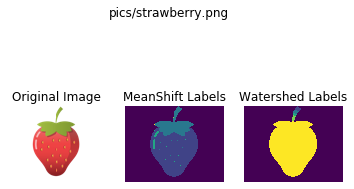

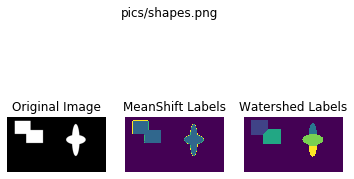

In [6]:
"""
COMP9517 Lab 03, Week 4
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image
size = 100, 100

img_names = ["pics/strawberry.png", "pics/shapes.png"]
ext_names = ["pics/coins.png", "pics/two_halves.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()


for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]

    #
    # +--------------------+
    # |     Question 1     |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    img_R = img_mat[:,:,0]
    img_G = img_mat[:,:,1]
    img_B = img_mat[:,:,2]
    
    height = len(img_R)
    width =len(img_R[0])

    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    img_R_ravel = img_R.ravel()
    img_G_ravel = img_G.ravel()
    img_B_ravel = img_B.ravel()
    
    colour_samples = np.array([img_R_ravel,img_G_ravel,img_B_ravel])
    colour_samples = colour_samples.T

    # Step 3 - Perform Meanshift  clustering
    #
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    ms_labels = np.reshape(ms_labels,(height,width))

    #%%
    #
    # +--------------------+
    # |     Question 2     |
    # +--------------------+
    #
    
    
    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray =img.convert("L")
    img_gray.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_array = np.array(img_gray)
    
    

	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_maxi = peak_local_max(distance, indices=False)
    markers = ndi.label(local_maxi)[0]
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=img_array)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    #plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",ws_labels, "Watershed Labels")
    

